In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Set parameters for the signal
N = 2048                # Number of sample points
T = 1.0                  # Duration of the signal in seconds
f0 = 1                   # fundamental frequency of the square wave in Hz

# list of harmonic numbers when constructing square wave
harmonics = [1, 3, 5]

In [3]:
# Reconstruct a square function (square wave) by summing sine waves of different frequencies using Fourier series.

# Define square wave function
def square_wave(t):
    return np.sign(np.sin(2.0 * np.pi * f0 * t))

# Fourier series approximation of square wave
def square_wave_fourier(t, f0, N):
    result = np.zeros_like(t)
    for k in range(N):
        n = 2 * k + 1  # Fourier series of a square wave only contains odd harmonics
        result += np.sin(2 * np.pi * n * f0 * t) / n # add harmonics to reconstruct square function
    return (4 / np.pi) * result

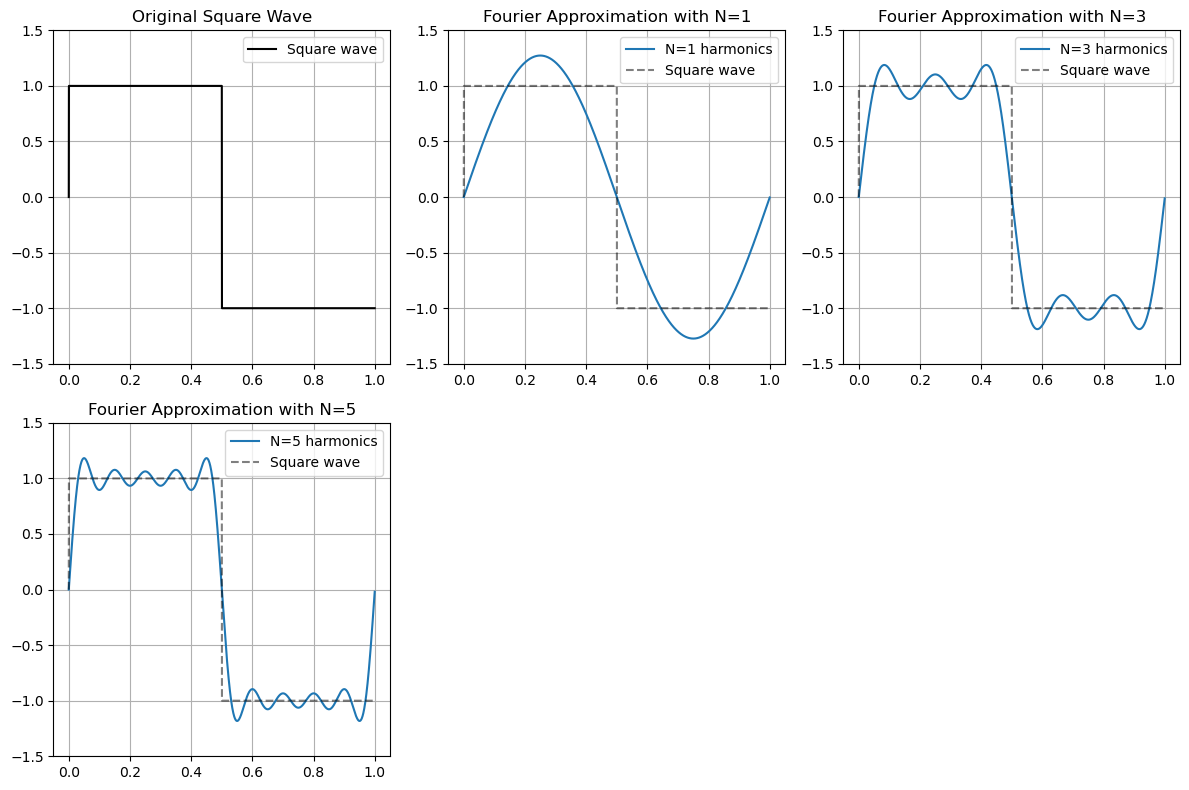

In [4]:
# Create the time vector
# np.linspace generates evenly spaced numbers over a specified interval.
# We use endpoint=False because the interval is periodic.
t = np.linspace(0.0, T, N, endpoint=False)

# generate original square wave
square = square_wave(t)

plt.figure(figsize=(12, 8))
# Plot original square wave
plt.subplot(2, 3, 1)
plt.plot(t, square, 'k', label="Square wave")
plt.title("Original Square Wave")
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.legend()
# Plot Fourier reconstructions
for i, Nh in enumerate(harmonics, start=2):
    plt.subplot(2, 3, i)
    y = square_wave_fourier(t, f0, Nh)
    plt.plot(t, y, label=f"N={Nh} harmonics")
    plt.plot(t, square, 'k--', alpha=0.5, label="Square wave")
    plt.title(f"Fourier Approximation with N={Nh}")
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

In [5]:
# 2. Apply the DFT and time the execution 
def naive_dft(x): 
    """
    Compute the Discrete Fourier Transform (DFT) of a 1D signal. 
    This is a "naïve" implementation that directly follows the DFT formula, 
    which has a time complexity of O(N^2). 
    Args: 
    x (np.ndarray): The input signal, a 1D NumPy array.
    Returns: np.ndarray: The complex-valued DFT of the input signal. 
    """
    N = len(x) # Create an empty array of complex numbers to store the DFT results
    X = np.zeros(N, dtype=np.complex128)
    # Iterate through each frequency bin (k)
    for k in range(N):
        # For each frequency bin, sum the contributions from all input samples (n)
        for n in range(N):
            # The core DFT formula: x[n] * e^(-2j * pi * k * n / N)
            angle = -2j * np.pi * k * n / N
            X[k] += x[n] * np.exp(angle)
    return X
# Construct a square wave using 50 harmonics 
signal = square_wave_fourier(t, f0, 50) 
# Time the naïve DFT implementation 
start_time_naive = time.time() 
dft_result = naive_dft(signal) 
end_time_naive = time.time() 
naive_duration = end_time_naive - start_time_naive 
# Time NumPy's FFT implementation 
start_time_fft = time.time() 
fft_result = np.fft.fft(signal) 
end_time_fft = time.time() 
fft_duration = end_time_fft - start_time_fft 
# 3. Print Timings and Verification 
print("--- DFT/FFT Performance Comparison ---") 
print(f"Naïve DFT Execution Time: {naive_duration:.6f} seconds") 
print(f"NumPy FFT Execution Time: {fft_duration:.6f} seconds") 
# It's possible for the FFT to be so fast that the duration is 0.0, so we handle that case. 
if fft_duration > 0: 
    print(f"FFT is approximately {naive_duration / fft_duration:.2f} times faster.") 
else: 
    print("FFT was too fast to measure a significant duration difference.") 
# Check if our implementation is close to NumPy's result 
# np.allclose is used for comparing floating-point arrays. 
print(f"\nOur DFT implementation is close to NumPy's FFT: {np.allclose(dft_result, fft_result)}")

--- DFT/FFT Performance Comparison ---
Naïve DFT Execution Time: 2.678835 seconds
NumPy FFT Execution Time: 0.036338 seconds
FFT is approximately 73.72 times faster.

Our DFT implementation is close to NumPy's FFT: True


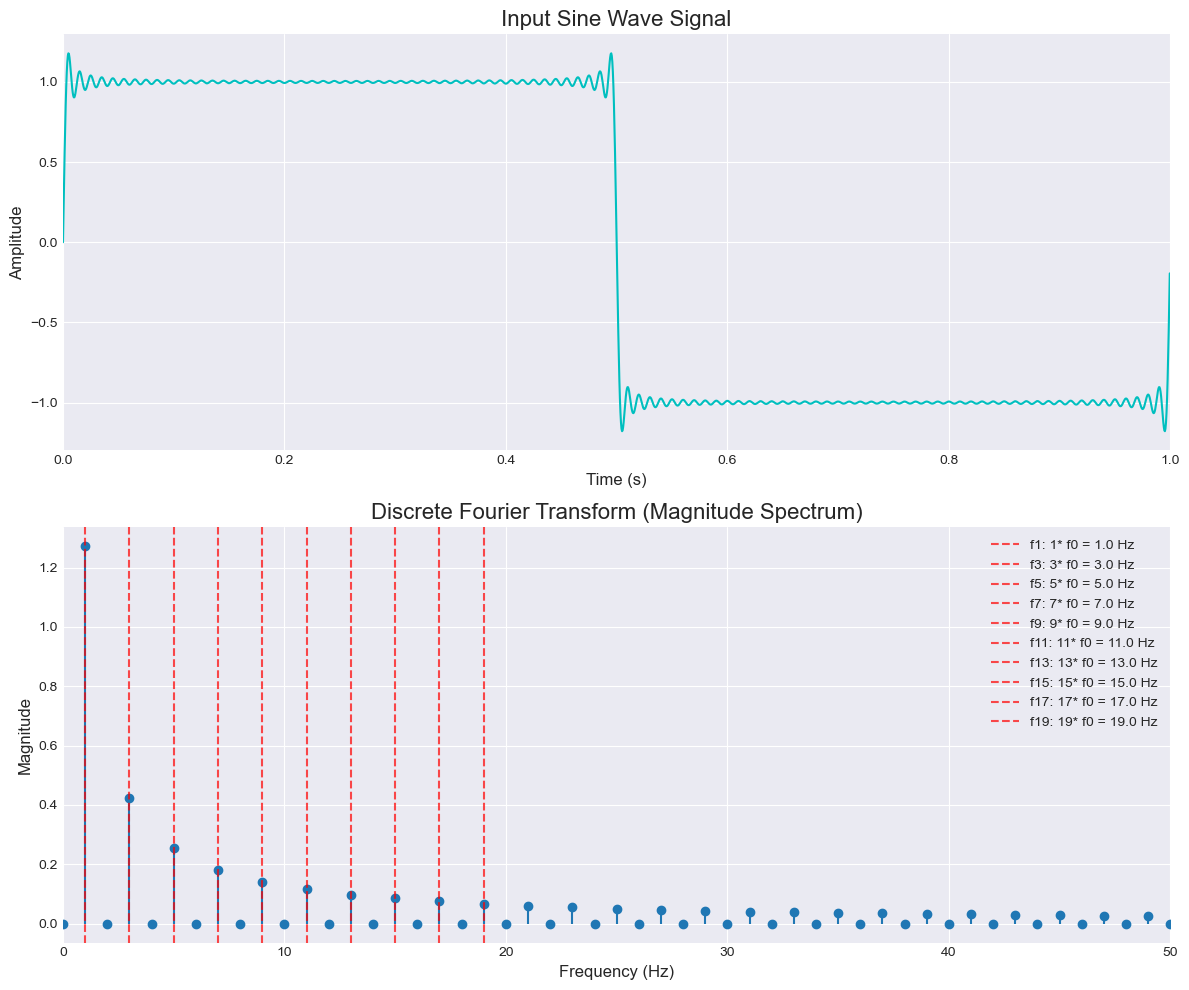

In [8]:
# Generate the frequency axis for the plot.
# np. fft. fftfreg returns the DFT sample frequencies.
# We only need the first half of the frequencies (the positive ones) due to symmetry.
xf = np.fft.fftfreq(N, d=1/N)[:N//2]
# We normalize the magnitude by N and multiply by 2 to get the correct amplitude.
magnitude = 2.0 / N * np.abs(dft_result[0:N//2])
# 5. Visualize the Results
plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
# Plot the original time-domain signal
ax1.plot(t, signal, color='c')
ax1.set_title('Input Sine Wave Signal', fontsize=16)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Amplitude', fontsize=12)
ax1.set_xlim(0, 1.0)  # Show a few cycles of the sine wave
ax1.grid(True)
# Plot the frequency-domain signal (magnitude of the DFT)
ax2.stem(xf, magnitude, basefmt=" ")
ax2.set_title(
    'Discrete Fourier Transform (Magnitude Spectrum)', fontsize=16
)
ax2.set_xlabel('Frequency (Hz)', fontsize=12)
ax2.set_ylabel('Magnitude', fontsize=12)
ax2.set_xlim(0, 50)  # Focus on lower frequencies
ax2.grid(True)
# Add vertical lines for the first ten frequencies
for i in range(20):
    if i < len(xf) and i % 2 == 1:  # Only plot odd harmonics
        ax2.axvline(
            xf[i], color='r', linestyle='--', alpha=0.7,
            label=f'f{i}: {i}* f0 = {xf[i]:.1f} Hz'
        )
# Only show labels for first 3 frequencies to avoid cluttering
ax2.legend()
plt.tight_layout()
plt.show()

In [9]:
import torch

In [10]:
def square_wave_torch(t, f0):
    return torch.sign(torch.sin(2.0 * torch.pi * f0 * t))

def square_wave_fourier_torch(t, f0, N):
    result = torch.zeros_like(t)
    for k in range(N):
        n = 2 * k + 1
        result += torch.sin(2 * torch.pi * n * f0 * t) / n
    return (4 / torch.pi) * result

def square_wave_torch(t, f0):
    return torch.sign(torch.sin(2.0 * torch.pi * f0 * t))

def square_wave_fourier_torch(t, f0, N):
    result = torch.zeros_like(t)
    for k in range(N):
        n = 2 * k + 1
        result += torch.sin(2 * torch.pi * n * f0 * t) / n
    return (4 / torch.pi) * result

In [13]:
def naive_dft_torch(x):
    N = x.shape[0]
    X = torch.zeros(N, dtype=torch.complex128)
    x = x.to(torch.complex128)
    for k in range(N):
        for n in range(N):
            angle = -2 * torch.pi * k * n / N
            exp_val = torch.exp(1j * angle)
            X[k] += x[n] * exp_val
    return X

def naive_dft_torch_gpu(x):
    N = x.shape[0]
    device = x.device
    k = torch.arange(N, device=device).reshape(-1, 1)
    n = torch.arange(N, device=device).reshape(1, -1)
    angle = -2j * torch.pi * k * n / N
    M = torch.exp(angle)
    return torch.matmul(M, x)

PyTorch version: 2.6.0
MPS not available, using CPU

Generating signal with N = 2048 points and 50 harmonics...

--- DFT/FFT Performance Comparison ---
1. Naïve NumPy DFT (CPU) Execution Time:   2.706963 seconds
2. Naïve PyTorch DFT (GPU) Execution Time: 0.050494 seconds
3. NumPy FFT (CPU) Execution Time:         0.003494 seconds
----------------------------------------
Methods in order of fastest to slowest:
1. NumPy FFT (CPU)           (0.003494 s)
2. Naïve PyTorch DFT (GPU)   (0.050494 s)
3. Naïve NumPy DFT (CPU)     (2.706963 s)


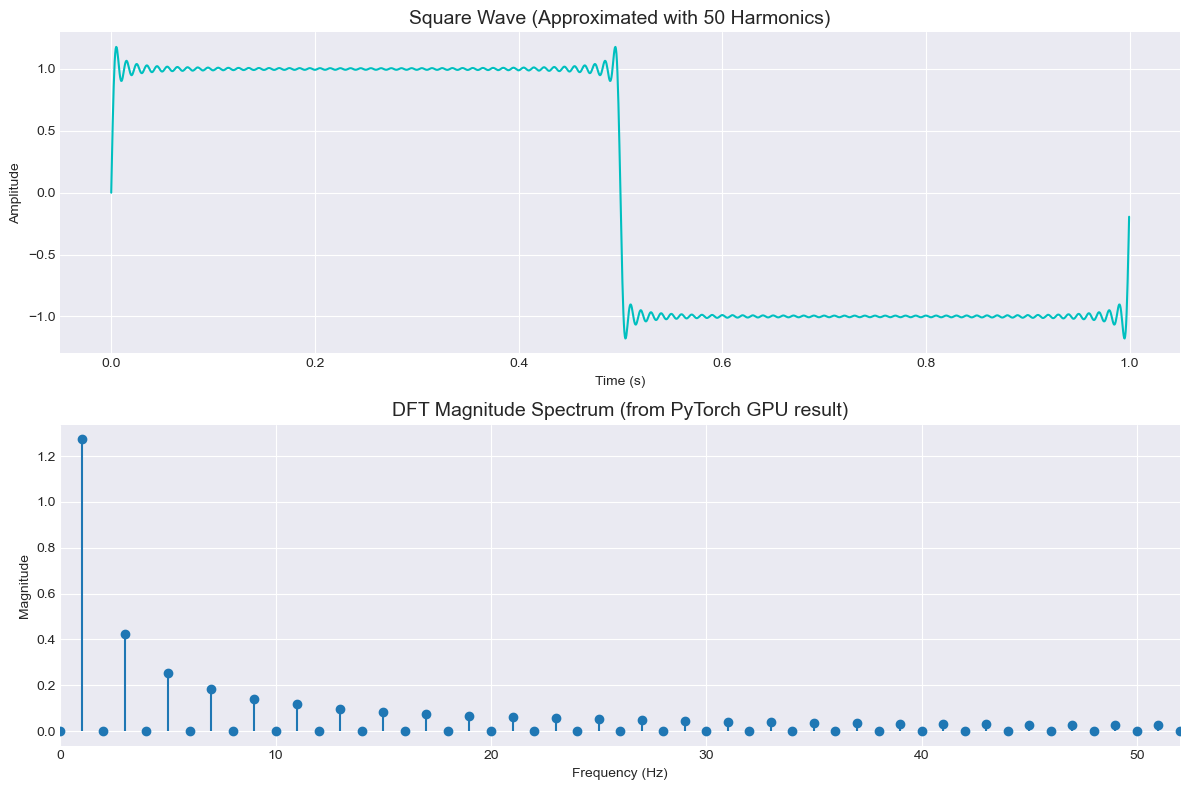

In [20]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import time
import torch

print(f"PyTorch version: {torch.__version__}")

# --- Device Configuration for MacBook M3 GPU ---
# Check if MPS (Apple Silicon GPU) is available and set it as the device
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using Apple Silicon GPU (MPS)")
else:
    device = torch.device("cpu")
    print("MPS not available, using CPU")

# --- Provided NumPy Code (for reference and comparison) ---

# Set parameters for the signal
N = 2048  # Number of sample points
T = 1.0  # Duration of the signal in seconds
f0 = 1   # Fundamental frequency of the square wave in Hz

# Create the time vector for NumPy
t_np = np.linspace(0.0, T, N, endpoint=False)

# Define the square wave function using NumPy
def square_wave_numpy(t):
    return np.sign(np.sin(2.0 * np.pi * f0 * t))

# Fourier series approximation of the square wave using NumPy
def square_wave_fourier_numpy(t, f0, num_harmonics):
    result = np.zeros_like(t)
    for k in range(num_harmonics):
        n = 2 * k + 1  # Square wave has only odd harmonics
        result += np.sin(2 * np.pi * n * f0 * t) / n
    return (4 / np.pi) * result

# Naïve DFT implementation using NumPy
def naive_dft_numpy(x):
    N_dft = len(x)
    X = np.zeros(N_dft, dtype=np.complex128)
    for k in range(N_dft):
        for n in range(N_dft):
            angle = -2j * np.pi * k * n / N_dft
            X[k] += x[n] * np.exp(angle)
    return X

# --- PART 1 TASK: PyTorch Implementation ---

# Create the time tensor for PyTorch using a more compatible method
t_torch = (torch.arange(N, device=device) / N) * T

def square_wave_pytorch(t):
    """ PyTorch implementation of the square wave function """
    return torch.sign(torch.sin(2.0 * torch.pi * f0 * t))

def square_wave_fourier_pytorch(t, f0, num_harmonics):
    """ PyTorch implementation of the Fourier series approximation """
    result = torch.zeros_like(t)
    for k in range(num_harmonics):
        n = 2 * k + 1
        result += torch.sin(2 * torch.pi * n * f0 * t) / n
    return (4 / torch.pi) * result

def naive_dft_pytorch_gpu(x_tensor):
    """ 
    PyTorch implementation of naïve DFT running on the specified device (GPU).
    This implementation explicitly uses tensor operations.
    """
    N_dft = len(x_tensor)
    # Create tensors for indices n and k
    n = torch.arange(N_dft, device=x_tensor.device).view(-1, 1)
    k = torch.arange(N_dft, device=x_tensor.device).view(1, -1)
    
    # Calculate the exponential term for all n, k pairs at once using broadcasting
    angle = -2j * torch.pi * k * n / N_dft
    exp_matrix = torch.exp(angle)
    
    # Perform the matrix-vector multiplication to get the DFT result
    X_tensor = torch.matmul(exp_matrix, x_tensor.cfloat().view(-1, 1)).flatten()
    
    return X_tensor

# --- Performance Comparison ---

# 1. Generate the signal
print(f"\nGenerating signal with N = {N} points and 50 harmonics...")
signal_np = square_wave_fourier_numpy(t_np, f0, 50)
# Generate signal with the new PyTorch time tensor
signal_torch = square_wave_fourier_pytorch(t_torch, f0, 50)


# 2. Time the NumPy Naïve DFT (CPU)
start_time_naive = time.time()
dft_naive_np = naive_dft_numpy(signal_np)
end_time_naive = time.time()
naive_duration = end_time_naive - start_time_naive

# 3. Time the PyTorch Naïve DFT (GPU)
signal_torch_gpu = signal_torch.to(device)
# First run can be slow due to GPU warm-up, so we run it once before timing
_ = naive_dft_pytorch_gpu(signal_torch_gpu) 
# Now the actual timed run
start_time_torch = time.time()
dft_torch_gpu = naive_dft_pytorch_gpu(signal_torch_gpu)
end_time_torch = time.time()
torch_duration = end_time_torch - start_time_torch

# 4. Time NumPy's FFT (CPU)
start_time_fft = time.time()
fft_result = np.fft.fft(signal_np)
end_time_fft = time.time()
fft_duration = end_time_fft - start_time_fft

# --- Print Timings and Analysis ---
print("\n--- DFT/FFT Performance Comparison ---")
print(f"1. Naïve NumPy DFT (CPU) Execution Time:   {naive_duration:.6f} seconds")
print(f"2. Naïve PyTorch DFT (GPU) Execution Time: {torch_duration:.6f} seconds")
print(f"3. NumPy FFT (CPU) Execution Time:         {fft_duration:.6f} seconds")
print("-" * 40)

# Create a sorted list of results
timings = {
    "NumPy FFT (CPU)": fft_duration,
    "Naïve PyTorch DFT (GPU)": torch_duration,
    "Naïve NumPy DFT (CPU)": naive_duration,
}
sorted_timings = sorted(timings.items(), key=lambda item: item[1])

print("Methods in order of fastest to slowest:")
for i, (method, t) in enumerate(sorted_timings):
    print(f"{i+1}. {method:<25} ({t:.6f} s)")

# --- Plotting the Results ---

# Move PyTorch result back to CPU and convert to NumPy for plotting
dft_torch_cpu = dft_torch_gpu.cpu().numpy()

# Generate frequency axis
xf = np.fft.fftfreq(N, d=T/N)[:N//2]
# Normalize magnitude
magnitude = 2.0/N * np.abs(dft_torch_cpu[0:N//2])

plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot time-domain signal
ax1.plot(t_np, signal_np, color='c')
ax1.set_title(f'Square Wave (Approximated with 50 Harmonics)', fontsize=14)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid(True)

# Plot frequency-domain signal (Magnitude Spectrum)
ax2.stem(xf, magnitude, basefmt=" ")
ax2.set_title('DFT Magnitude Spectrum (from PyTorch GPU result)', fontsize=14)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Magnitude')
ax2.set_xlim(0, 52) # Focus on the first 50 Hz
ax2.grid(True)

plt.tight_layout()
plt.show()